In [27]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [28]:
csv_file_path = '/home/lucas/UFOP/ple_2020/analise_midias_sociais/final-work/data/all_pp_posts_haddad_replaced_to_empty_removing_other_words.csv'
df_candidate = pd.read_csv(csv_file_path,encoding = 'utf-8')

In [29]:
df_candidate.head(15)

,created_time,id,message_max_processed,m_m_p_replaced_to_empty,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message
0,2020-02-29T11:23:27+0000,904277726319518_2878974912183113,bolsonavirus nada erroneo considerar bolsonaro...,bolsonavirus nada erroneo considerar acident...,818,shared_story,https://external-gru1-1.xx.fbcdn.net/safe_imag...,4996,209,19,40,58,636,True
1,2020-02-29T09:21:22+0000,904277726319518_2878783568868914,bolsonavirus nada erroneo considerar bolsonaro...,bolsonavirus nada erroneo considerar raio ce...,477,shared_story,https://external-gru1-1.xx.fbcdn.net/safe_imag...,2602,84,14,26,19,130,True
2,2020-02-28T00:14:25+0000,904277726319518_2875616525852285,cristiano zanin advogado lula fernando haddad ...,cristiano zanin advogado discutem novidade...,540,mobile_status_update,https://scontent-gru2-2.xx.fbcdn.net/v/t15.525...,3068,120,23,4,20,140,True
3,2020-02-26T12:12:56+0000,904277726319518_2872245456189392,disney pao ano governo bolsonaro sabia falta d...,disney pao ano governo sabia falta dinheiro ...,1068,shared_story,https://external-gru1-1.xx.fbcdn.net/safe_imag...,3148,48,24,1306,616,8,True
4,2020-02-26T00:58:59+0000,904277726319518_2871255852955019,bolsonaro tudo indica cometeu crime responsabi...,tudo indica cometeu crime responsabilidade p...,1369,mobile_status_update,None,21619,524,79,68,77,1923,True
5,2020-02-24T19:51:01+0000,904277726319518_2868531243227480,impacto fundeb criamos qualidade educacao nord...,impacto fundeb criamos qualidade educacao nord...,3249,shared_story,https://external-gru1-1.xx.fbcdn.net/safe_imag...,10571,86,45,9,2,2635,True
6,2020-02-22T13:03:28+0000,904277726319518_2863199017094036,cronica semana podemos descuidar dois problema...,cronica semana podemos descuidar dois problema...,528,shared_story,https://external-gru1-1.xx.fbcdn.net/safe_imag...,2718,80,31,130,34,31,True
7,2020-02-22T00:18:55+0000,904277726319518_2862087573871847,bem falaram carnaval rua sp ia rolar triste ne,bem falaram carnaval rua sp ia rolar triste ne,1289,added_photos,https://scontent-gru1-1.xx.fbcdn.net/v/t1.0-9/...,29857,1003,132,25,14,12585,True
8,2020-02-20T11:28:49+0000,904277726319518_2858610960886175,clara tentativa desestabilizar melhores govern...,clara tentativa desestabilizar melhores govern...,588,mobile_status_update,None,9914,223,12,19,7,820,True
9,2020-02-18T20:38:19+0000,904277726319518_2855332637880674,brasilia discutindo oposicao brasil justo demo...,brasilia discutindo oposicao brasil justo demo...,541,added_photos,https://scontent-gru2-1.xx.fbcdn.net/v/t1.0-9/...,9555,369,32,3,20,2114,True


In [71]:
n_total_posts = len(df_candidate)
print('número total de posts: {0}'.format(str(n_total_posts)))

número total de posts: 1880


In [72]:
n_posts_with_textual_messages = df_candidate[df_candidate.has_textual_message == True].shape[0]
n_posts_without_textual_messages = df_candidate[df_candidate.has_textual_message == False].shape[0]

print('número de posts com mensagens textuais: {0}'.format(str(n_posts_with_textual_messages)))
print('número de posts sem mensagens textuais: {0}'.format(str(n_posts_without_textual_messages)))

número de posts com mensagens textuais: 1799
número de posts sem mensagens textuais: 81


In [32]:
# Devemos remover esses posts sem menssagem antes de continuar a nossa análise?
# renomear depois o df caso sim

#filter_mask  = df_candidate['has_textual_message'] == True
#df_candidate = df_candidate[filter_mask]
#print('número de posts do df desconsiderando os posts sem menssagens textuais: {0}'.format(str(len(df_candidate))))

In [87]:
# separando o df de treinamento (30%) e o df de testes(70%) de maneira 'embaralhada'
df_training, df_test = train_test_split(df_candidate,train_size=0.7,test_size=0.3,shuffle=True)

In [88]:
print('número de posts do conjunto de treinamento (70%): {0}'.format(str(len(df_training))))
df_training.head(5)

número de posts do conjunto de treinamento (70%): 1316


,created_time,id,message_max_processed,m_m_p_replaced_to_empty,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message
1068,2018-09-07T11:00:02+0000,904277726319518_2259012440999888,assista programa eleitoral coligacao povo feli...,assista programa eleitoral coligacao povo feli...,17280,added_video,https://scontent-gru1-1.xx.fbcdn.net/v/t15.525...,27960,433,70,13,145,2428,True
209,2019-08-04T17:33:12+0000,904277726319518_2451405461606729,negocios familia gostaria estar errado indicac...,negocios familia gostaria estar errado indicac...,3193,shared_story,https://external-gru1-1.xx.fbcdn.net/safe_imag...,7338,396,171,272,1580,32,True
309,2019-05-23T18:18:51+0000,904277726319518_2325346614212615,demos inicio caravana lula livre amazonia visi...,demos inicio caravana livre amazonia visitar...,604,added_photos,https://scontent-gru1-1.xx.fbcdn.net/v/t1.0-9/...,8880,128,36,2,10,2102,True
1423,2016-10-05T17:05:30+0000,904277726319518_1182091818538106,hoje seminario puc galera animada valeu,hoje seminario puc galera animada valeu,295,added_photos,https://scontent-gru2-1.xx.fbcdn.net/v/t31.0-0...,15887,11,47,3,3,2261,True
1001,2018-09-17T22:54:53+0000,904277726319518_1890776401004428,governo lula economia brasileira viveu melhor ...,governo economia brasileira viveu melhor fas...,13897,added_video,https://scontent-gru1-1.xx.fbcdn.net/v/t15.525...,20034,216,47,7,59,1406,True


In [89]:
print('número de posts do conjunto de teste (30%): {0}'.format(str(len(df_test))))
df_test.head(5)

número de posts do conjunto de teste (30%): 564


,created_time,id,message_max_processed,m_m_p_replaced_to_empty,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message
221,2019-07-27T17:14:38+0000,904277726319518_2437501772997098,proximo painel haddad escritora feminista djam...,proximo painel escritora feminista djamila r...,343,added_photos,https://scontent-gru2-2.xx.fbcdn.net/v/t1.0-9/...,5357,165,51,2,9,1133,True
318,2019-05-21T12:33:51+0000,904277726319518_2321581751255768,milicias legalizadas decreto bolsonaro libera ...,milicias legalizadas decreto libera compra f...,3265,shared_story,https://external-gru1-1.xx.fbcdn.net/safe_imag...,4317,97,205,2269,2961,70,True
673,2018-10-26T15:31:52+0000,904277726319518_2164668590211535,fernando haddad governador ricardo coutinho ca...,governador ricardo coutinho caminhada virada...,13228,added_video,https://scontent-gru2-2.xx.fbcdn.net/v/t15.525...,14844,509,84,18,381,7250,True
1174,2018-08-20T03:05:33+0000,904277726319518_250261315627220,fernando haddad vice chapa lula participa prog...,vice chapa participa programa canal livre ...,4813,added_video,https://scontent-gru2-2.xx.fbcdn.net/v/t15.525...,4059,35,53,6,67,2545,True
1190,2018-08-15T13:34:26+0000,904277726319518_278472856300917,comissao pt visita grevistas fome brasilia lul...,comissao pt visita grevistas fome brasilia li...,224,added_video,https://scontent-gru2-2.xx.fbcdn.net/v/t15.525...,975,12,19,6,0,208,True


In [90]:
#============================================================================================
# Implementacao do lda
#============================================================================================

In [91]:
# min_df = 0.01 significa "ignorar termos que aparecem em menos de 1% dos documentos
# max_df = 0.50 significa "ignorar termos que aparecem em mais de 50% dos documentos ".

# max_features=40000
cv = CountVectorizer(stop_words = "english")

data_vectorized = cv.fit_transform(df_training['m_m_p_replaced_to_empty'])

In [92]:
n_components = 6

model_lda = LatentDirichletAllocation(n_components=n_components, # Number of topics
                                      max_iter=100,
                                      #learning_method='online',
                                      random_state=100,
                                      batch_size=128,            
                                      evaluate_every = -1,       
                                      n_jobs = -1,               
                                     )
model_lda.fit(data_vectorized)

LatentDirichletAllocation(max_iter=100, n_components=6, n_jobs=-1,
                          random_state=100)

In [99]:
# objetivo: tentar encontrar um numero bom de tópicos a fim de conseguirmos destinguir as
# categorias 

'''
#forma antiga
for index, topic in enumerate(model_lda.components_):
    print(f'Top 10 words for #{index}')
    main_words_for_topic = [cv.get_feature_names()[i] for i in topic.argsort()[-10:]]
    print(main_words_for_topic)
    print(str(len(main_words_for_topic)))
    message = ' '
    message = message.join(main_words_for_topic)
    print(message)
    print('\n')
'''
# Mostrar as n principais palavras-chave para cada tópico 
def get_topics(vectorizer=cv, lda_model=model_lda, n_words=15):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (topic_weights).argsort()[-n_words:]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords


topic_keywords = get_topics(cv,model_lda,10)

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Palavra '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Tópico '+str(i) for i in range(df_topic_keywords.shape[0])]

df_topic_keywords

,Palavra 0,Palavra 1,Palavra 2,Palavra 3,Palavra 4,Palavra 5,Palavra 6,Palavra 7,Palavra 8,Palavra 9
Tópico 0,vai,governo,pessoas,dia,brasil,prefeitura,vamos,hoje,cidade,paulo
Tópico 1,todos,programa,participa,gestao,governo,prefeitura,entrevista,cidade,candidato,paulo
Tópico 2,tv,gestao,milhoes,democracia,programa,politicas,hoje,povo,cidade,paulo
Tópico 3,paulo,vamos,brasil,caminhada,grande,presidente,livre,educacao,cidade,ato
Tópico 4,ano,hospital,hora,cidade,anos,vamos,paulo,hoje,saude,brasil
Tópico 5,todos,lgbt,zona,imprensa,sul,brasil,anos,educacao,paulo,cidade


In [94]:
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Log Likelihood: ", model_lda.score(data_vectorized)) # Maior, melhor
print("Perplexity: ", model_lda.perplexity(data_vectorized)) # Menor, Melhor
# See model parameters
print(model_lda.get_params())

Log Likelihood:  -208276.02126171015
Perplexity:  5645.274418121596
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 100, 'mean_change_tol': 0.001, 'n_components': 6, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 100, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [124]:
classifications = ['Governo','Candidatos','Democracia','Ato de Campanha','Saúde','LGBT']

df_topic_keywords ["Classificacao"] = classifications

df_topic_keywords


,Palavra 0,Palavra 1,Palavra 2,Palavra 3,Palavra 4,Palavra 5,Palavra 6,Palavra 7,Palavra 8,Palavra 9,Classificacao
Tópico 0,vai,governo,pessoas,dia,brasil,prefeitura,vamos,hoje,cidade,paulo,Governo
Tópico 1,todos,programa,participa,gestao,governo,prefeitura,entrevista,cidade,candidato,paulo,Candidatos
Tópico 2,tv,gestao,milhoes,democracia,programa,politicas,hoje,povo,cidade,paulo,Democracia
Tópico 3,paulo,vamos,brasil,caminhada,grande,presidente,livre,educacao,cidade,ato,Caminhada de Campanha
Tópico 4,ano,hospital,hora,cidade,anos,vamos,paulo,hoje,saude,brasil,Saúde
Tópico 5,todos,lgbt,zona,imprensa,sul,brasil,anos,educacao,paulo,cidade,LGBT


In [135]:
def predict_topic(text,vectorizer=cv):
    # vetorizacao
    text_vectorized = vectorizer.transform([text])
    # LDA do texto
    topic_probability_scores = model_lda.transform(text_vectorized)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), 0:10].values.tolist()
    # inferindo o topico
    infer_topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), -1]
    return infer_topic, topic, topic_probability_scores


# Predict the topic
mytext = 'Melhorar a saude é importante para o nosso cenario atual'
mytext = 'O publico lgbt precisa de apoio'

# educação esta ligado a lgbt (topico 5)

infer_topic, topic, prob_scores = predict_topic(text = mytext)
print(prob_scores)
print(topic)
print(infer_topic)

[[0.03363906 0.03368198 0.03356657 0.03348229 0.03364813 0.83198196]]
['todos', 'lgbt', 'zona', 'imprensa', 'sul', 'brasil', 'anos', 'educacao', 'paulo', 'cidade']
LGBT


In [126]:
#===========================================================================
# removendo os posts sem menssagens do df_test
#===========================================================================
print('tamanho anterior do df test: {0}'.format(str(len(df_test))))
filter_mask  = df_test['has_textual_message'] == True
df_test = df_test[filter_mask]
print('número de posts do df teste desconsiderando os posts sem menssagens textuais: {0}'.format(str(len(df_test))))

tamanho anterior do df test: 545
número de posts do df teste desconsiderando os posts sem menssagens textuais: 545


In [127]:
#===========================================================================
# predizendo o topico por de cada uma das mensagens por meio do modelo lda
#===========================================================================

df_test['topic_classification'] = df_test['m_m_p_replaced_to_empty'].apply(lambda text:predict_topic(text,vectorizer=cv)[0])

In [128]:
df_test.head()

,created_time,id,message_max_processed,m_m_p_replaced_to_empty,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message,topic_classification
221,2019-07-27T17:14:38+0000,904277726319518_2437501772997098,proximo painel haddad escritora feminista djam...,proximo painel escritora feminista djamila r...,343,added_photos,https://scontent-gru2-2.xx.fbcdn.net/v/t1.0-9/...,5357,165,51,2,9,1133,True,Democracia
318,2019-05-21T12:33:51+0000,904277726319518_2321581751255768,milicias legalizadas decreto bolsonaro libera ...,milicias legalizadas decreto libera compra f...,3265,shared_story,https://external-gru1-1.xx.fbcdn.net/safe_imag...,4317,97,205,2269,2961,70,True,Caminhada de Campanha
673,2018-10-26T15:31:52+0000,904277726319518_2164668590211535,fernando haddad governador ricardo coutinho ca...,governador ricardo coutinho caminhada virada...,13228,added_video,https://scontent-gru2-2.xx.fbcdn.net/v/t15.525...,14844,509,84,18,381,7250,True,Candidatos
1174,2018-08-20T03:05:33+0000,904277726319518_250261315627220,fernando haddad vice chapa lula participa prog...,vice chapa participa programa canal livre ...,4813,added_video,https://scontent-gru2-2.xx.fbcdn.net/v/t15.525...,4059,35,53,6,67,2545,True,Caminhada de Campanha
1190,2018-08-15T13:34:26+0000,904277726319518_278472856300917,comissao pt visita grevistas fome brasilia lul...,comissao pt visita grevistas fome brasilia li...,224,added_video,https://scontent-gru2-2.xx.fbcdn.net/v/t15.525...,975,12,19,6,0,208,True,Candidatos


In [129]:
#===========================================================================
# ordenando df_test por reacoes angry
#===========================================================================

df_test_sorted_by_angry = df_test.sort_values('reactions_angry', ascending=False) # ordenando o df por angry

In [130]:
#===========================================================================
# contando as categorias de tópicos apenas para as 30 postagens com +
# reações angry durante as eleições de 2018
#===========================================================================

category_count_2018_sorted_by_angry = df_test_sorted_by_angry.head(30)['topic_classification'].value_counts()
print(category_count_2018_sorted_by_angry)

Candidatos               9
Governo                  7
Caminhada de Campanha    7
LGBT                     4
Democracia               2
Saúde                    1
Name: topic_classification, dtype: int64


Text(0, 0.5, 'Frequência')

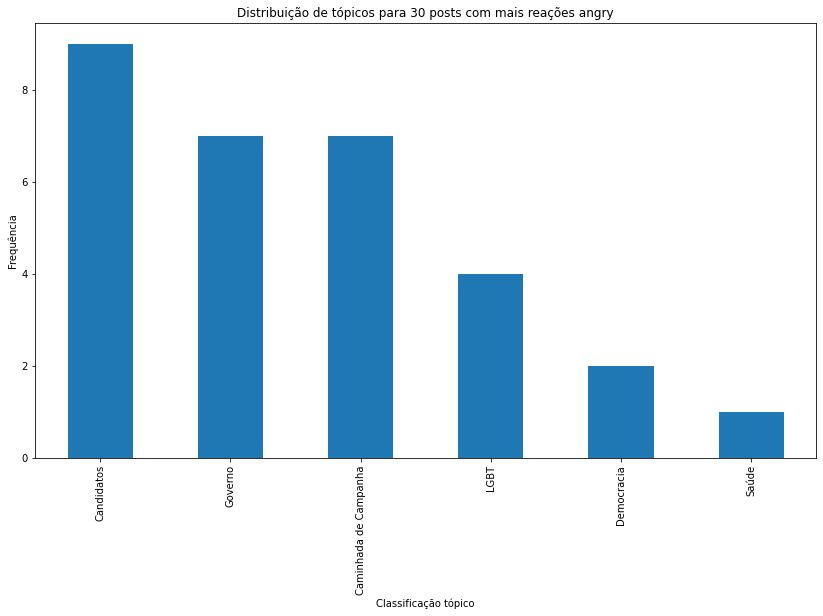

In [136]:
#===========================================================================
# as composicoes de topico relativas da amostra são então iluminadas com um 
# gráfico de barras (ano de 2018 para os posts com mais reações angry - 30)
#===========================================================================

ax = category_count_2018_sorted_by_angry.plot(kind='bar',
                                    figsize=(14,8),
                                    title="Distribuição de tópicos para 30 posts com mais reações angry")
ax.set_xlabel("Classificação tópico")
ax.set_ylabel("Frequência")

In [137]:
#===========================================================================
# Iterando sobre o df para visualizar as menssagens e seus topicos inferidos
#===========================================================================

for index,row in df_test_sorted_by_angry.iterrows():
   print(row['m_m_p_replaced_to_empty'],':::',row['topic_classification'],'\n\n')

  fala vivo radios bahia   ::: LGBT 


guarda civil mata ciclista tres tiros apos discussao legitima defesa ::: Candidatos 


  desautoriza operacao andamento ibama contra madeira ilegal rondonia ::: Governo 


  candidato   presidencia conversa povo brasileiro ::: Candidatos 


  trocou ministro educacao ridiculo outro ridiculo autoritario ::: Governo 


bozonazis tentam responsabilizar   morte neto produzem pior fake news todas aqui ::: Caminhada de Campanha 


experiencia requisito basico deste governo defensora ensino domiciliar assume pasta educacao ::: Governo 


  candidato presidencia participa programa panico jovem pan   ::: Democracia 


oferta feita   ceder parte territorio instalacao base militar americana concretize medidas dramaticas simbolicas novo governo ::: Saúde 


rolando alegria ::: Governo 


economista anos nenhuma especializacao educacao comandara inep responsavel maior vestibular pais ::: LGBT 


  participa ato virada tuca sp   ::: Caminhada de Campanha 


her

  candidato vicepresidente visita metalurgicos ford bernardo campo sp ::: Candidatos 


ultima sextafeira participei debate legal organizado quebrando tabu mediacao jout jout prazer discutimos temas relacionados area educacao paola carosella alice ribeiro rosane borges maria pilar wilson levy aqui integra ::: Democracia 


bati papo querido   gordo felizmente casa recuperando hoje h canal panelaco ::: Caminhada de Campanha 


perca amanha festival   livre ::: Caminhada de Campanha 


hoje h vai ar entrevista dei querido gilberto gil canal brasil foto ricardo stuckert ::: Candidatos 


completamos anos casamento semana conhece ana estela sabe privilegio acompanhar trajetoria mulher profissional militante incrivel amor ::: Governo 


entrevista dei revista cult escola publica expressao maior cultura acolhe dialoga interage ::: Saúde 


grande noticia segundo paciente curado hiv transplante ce stronco ::: Governo 


plenaria sindicalistas vivemos momento intensa luta politica contra medid